In [ ]:
!pip install yfinance
!pip install pystan==2.19.1.1 prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv48es1wx/p53xa6kl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv48es1wx/m5qtnkhn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54931', 'data', 'file=/tmp/tmpv48es1wx/p53xa6kl.json', 'init=/tmp/tmpv48es1wx/m5qtnkhn.json', 'output', 'file=/tmp/tmpv48es1wx/prophet_modelkjv0fn3s/prophet_model-20221007041348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:13:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


(800, 2) (29, 2)


04:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


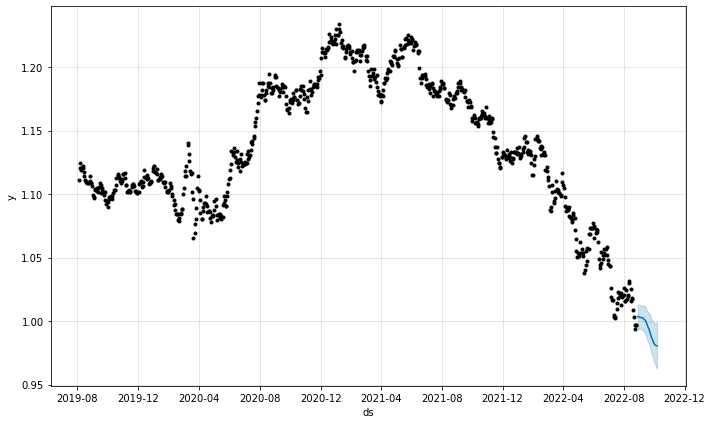

In [17]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import plotly.graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation 

plt.rcParams["figure.figsize"] = (10,5.5)
warnings.filterwarnings('ignore')
pd.options.display.float_format = '${:,.4f}'.format

df = yf.Ticker('EURUSD=X')
df = df.history(period = '830d')
df.reset_index(inplace = True)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['Time'],df['Date']= df['Date'].apply(lambda x:x.time()), df['Date'].apply(lambda x:x.date())

df = df.drop(['Volume', 'Dividends', 'Stock Splits', 'Time'], axis = 1)
df = df[['Date', 'Close']]
df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace = True)

train_set = df.iloc[:800]
train_set.reset_index(drop = True, inplace = True)
test_set = df.iloc[800:]
test_set.reset_index(drop = True, inplace = True)
print(train_set.shape, test_set.shape)

 # Gráfico dos dados de treino

#fig = go.Figure()
#fig.add_trace(go.Scatter(x = train_set['ds'], y = train_set['y']))

model = Prophet(seasonality_mode='multiplicative')

model.fit(train_set)
previsao = model.predict(test_set)

model.plot(previsao);


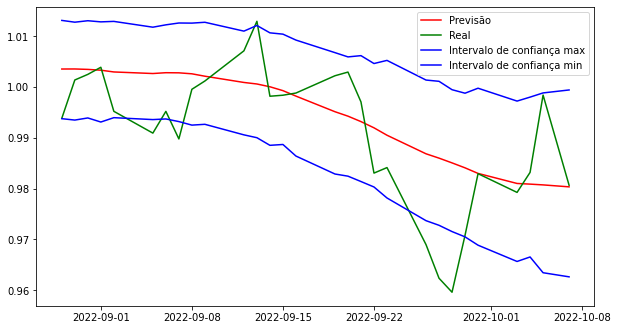

In [18]:
x = test_set['ds']
y = previsao['yhat']
z = test_set['y']
h = previsao['yhat_upper']
i = previsao['yhat_lower']

plt.plot(x, y, 'r', label='Previsão')

plt.plot(x, z, 'g', label='Real')

plt.plot(x, h, 'b', label='Intervalo de confiança max')

plt.plot(x, i, 'b', label='Intervalo de confiança min')



plt.legend()
plt.show()

In [19]:
x = test_set['ds']
y = previsao['yhat']
z = test_set['y']
h = previsao['yhat_upper']
i = previsao['yhat_lower']


comparacao = pd.concat([x, z, y, h, i], 1)
comparacao.rename(columns = {'ds': 'Data', 'y': 'Real', 'yhat': 'Previsao', 'yhat_upper': 'Previsao_max', 'yhat_lower': 'Previsao_min'}, inplace = True)

lista = []
for index, row in comparacao.iterrows():
  if(list(comparacao['Real']) > list(comparacao['Previsao_min'])) & (list(comparacao['Real']) < list(comparacao['Previsao_max'])): lista.append('Verificado e Aprovado')
    
  else: lista.append('Recusado')

comparacao['Valor_Intervalor de confiança'] = lista
comparacao

,Data,Real,Previsao,Previsao_max,Previsao_min,Valor_Intervalor de confiança
0,2022-08-29,$0.9939,$1.0036,$1.0131,$0.9938,Verificado e Aprovado
1,2022-08-30,$1.0014,$1.0036,$1.0128,$0.9935,Verificado e Aprovado
2,2022-08-31,$1.0025,$1.0035,$1.0131,$0.9939,Verificado e Aprovado
3,2022-09-01,$1.0039,$1.0033,$1.0128,$0.9931,Verificado e Aprovado
4,2022-09-02,$0.9952,$1.0030,$1.0129,$0.9940,Verificado e Aprovado
5,2022-09-05,$0.9909,$1.0027,$1.0118,$0.9936,Verificado e Aprovado
6,2022-09-06,$0.9952,$1.0028,$1.0123,$0.9937,Verificado e Aprovado
7,2022-09-07,$0.9898,$1.0028,$1.0126,$0.9932,Verificado e Aprovado
8,2022-09-08,$0.9996,$1.0026,$1.0126,$0.9925,Verificado e Aprovado
9,2022-09-09,$1.0012,$1.0021,$1.0128,$0.9927,Verificado e Aprovado


In [20]:
print('MAE: {}'.format(metrics.mean_absolute_error(test_set['y'].values, previsao['yhat'].values)))
print('RMSE: {}'.format(metrics.mean_squared_error(test_set['y'].values, previsao['yhat'].values, squared = False)))

MAE: 0.007474745764077557
RMSE: 0.01019854775147756


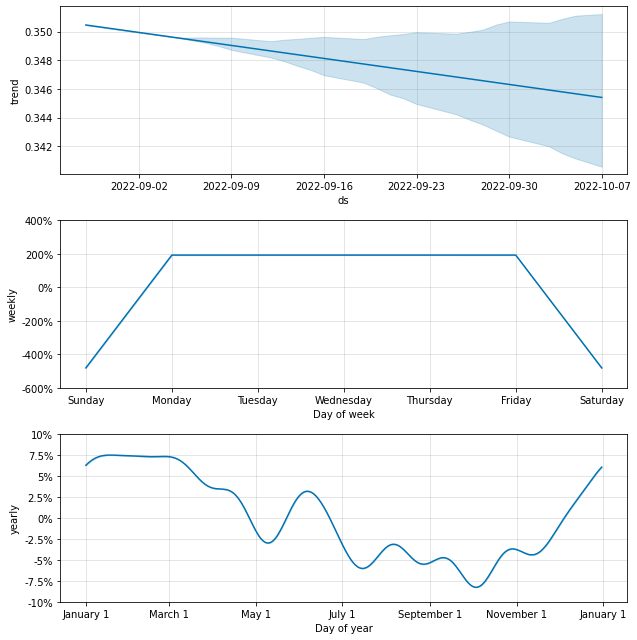

In [21]:
components = model.plot_components(previsao)
components;

Vamos colocar nosso modelo pra funcionar e testar se realmente funciona, abrindo uma operação no índice


DEBUG:cmdstanpy:input tempfile: /tmp/tmpv48es1wx/xcjrvtd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv48es1wx/koxxefkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6192', 'data', 'file=/tmp/tmpv48es1wx/xcjrvtd6.json', 'init=/tmp/tmpv48es1wx/koxxefkv.json', 'output', 'file=/tmp/tmpv48es1wx/prophet_modelgzegwd9j/prophet_model-20221007041402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:14:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


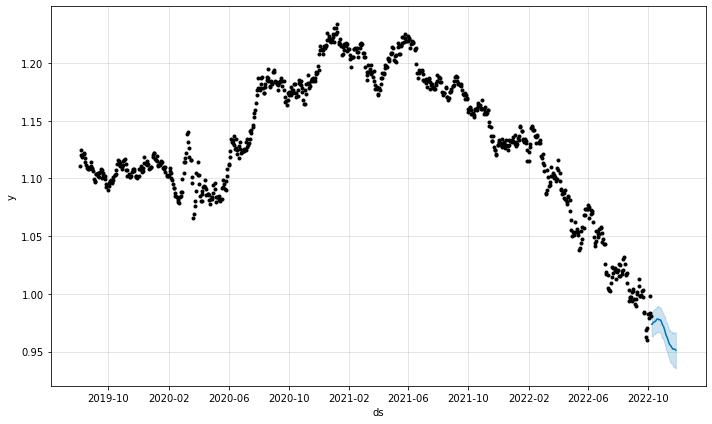

In [22]:
model = Prophet(daily_seasonality = True)
model.fit(df)
df_futuro = model.make_future_dataframe(50)
df_futuro = df_futuro.tail(50).reset_index(drop = True)
previsao = model.predict(df_futuro)

model.plot(previsao);

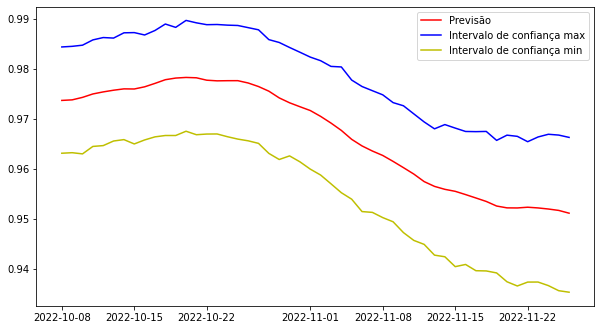

In [23]:
# Define data values
x = df_futuro['ds']
y = previsao['yhat']
h = previsao['yhat_upper']
i = previsao['yhat_lower']

# Plot a simple line chart
plt.plot(x, y, 'r', label='Previsão')

# Plot another line on the same chart/graph


plt.plot(x, h, 'b', label='Intervalo de confiança max')

plt.plot(x, i, 'y', label='Intervalo de confiança min')



plt.legend()
plt.show()

In [24]:
pd.set_option('display.max_rows', 500)
previsao.set_index('ds')[['yhat_lower', 'yhat', 'yhat_upper']]

,yhat_lower,yhat,yhat_upper
ds,,,
2022-10-08,$0.9631,$0.9737,$0.9844
2022-10-09,$0.9632,$0.9738,$0.9845
2022-10-10,$0.9630,$0.9743,$0.9847
2022-10-11,$0.9644,$0.9749,$0.9858
2022-10-12,$0.9646,$0.9754,$0.9862
2022-10-13,$0.9655,$0.9757,$0.9861
2022-10-14,$0.9658,$0.9760,$0.9872
2022-10-15,$0.9649,$0.9759,$0.9872
2022-10-16,$0.9657,$0.9764,$0.9868
